In [881]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingRegressor


data_frame = pd.read_csv('CarPrice_Assignment.csv')
data_frame.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### DataSet
https://www.kaggle.com/hellbuoy/car-price-prediction

## Data Inspection

In [882]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [883]:
data_frame.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [884]:
data_frame.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [885]:
data_frame.shape

(205, 26)

In [886]:
data_frame.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

## Data Cleaning and Preparation

### Fixing invalid values

In [887]:
CompanyName = data_frame['CarName'].apply(lambda x : x.split(' ')[0])
data_frame.insert(3,"CompanyName",CompanyName)
data_frame.drop(['CarName'],axis=1,inplace=True)
data_frame.head()
data_frame.CompanyName.unique()
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- maxda = mazda
- Nissan = nissan
- porcshce = porsche
- toyouta = toyota
- vokswagen = volkswagen
- vw = volkswagen

In [888]:
data_frame['CompanyName'] = data_frame['CompanyName'].str.lower()

def replace(name1, name2):
    data_frame['CompanyName'].replace(name1, name2, inplace=True)

replace('maxda', 'mazda')
replace('porcshce', 'porsche')
replace('toyouta', 'toyota')
replace('vokswagen', 'volkswagen')
replace('vw', 'volkswagen')


data_frame.CompanyName.unique()
data_frame

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Checking Duplicates


In [889]:
data_frame.loc[data_frame.duplicated()]
# No duplicate values

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


### Checking Null values 


In [890]:
data_frame.isnull().sum()
# There are no NULL values in the dataset

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [891]:
data_frame

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [892]:
#create list for categorical variables
categorical_features= list(data_frame.select_dtypes(include=['object']).keys())

data_frame[categorical_features].head()

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi


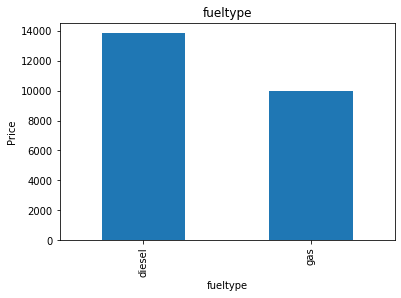

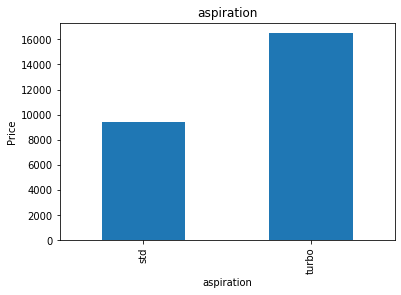

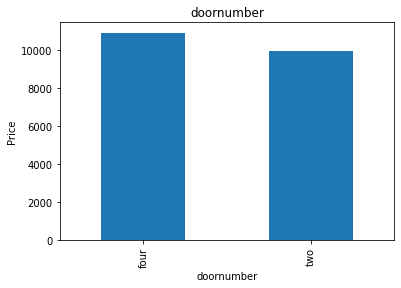

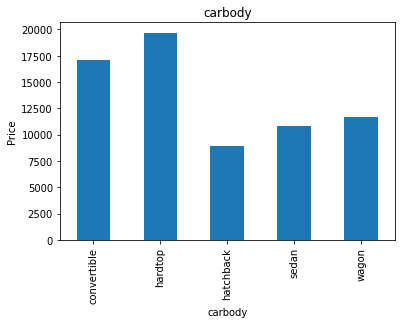

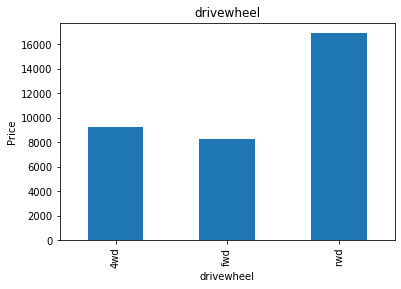

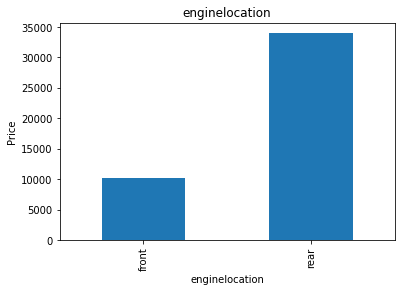

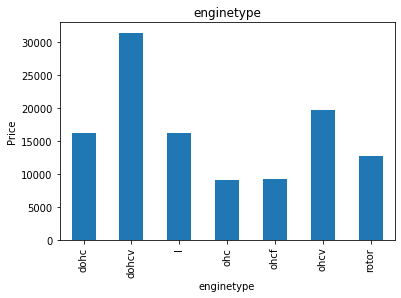

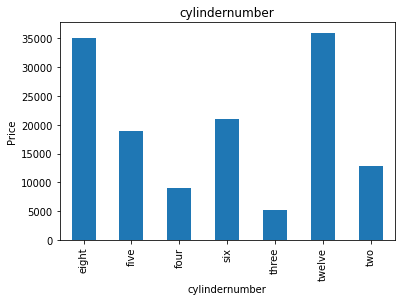

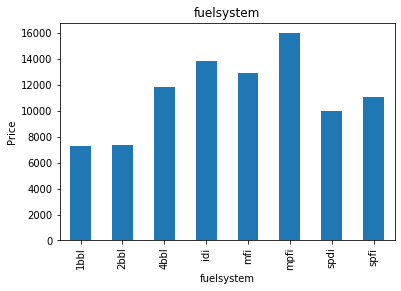

In [893]:
categorical_features.remove('CompanyName')
for feature in categorical_features:
    df=data_frame.copy()
    df.groupby(feature)['price'].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.show()

<AxesSubplot:xlabel='CompanyName'>

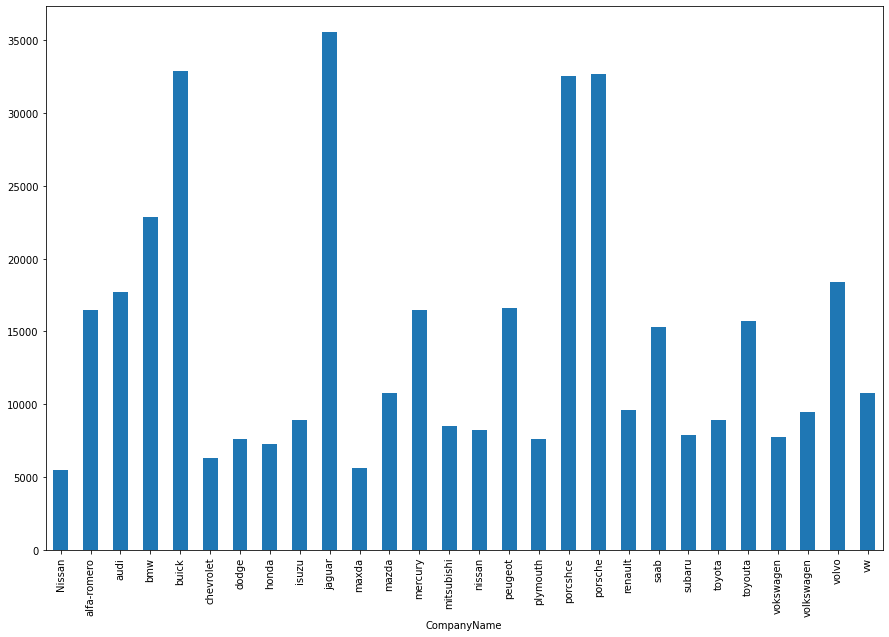

In [894]:
plt.figure(figsize=(15,10))
data.groupby('CompanyName')['price'].median().plot.bar()

### Feature Scaling

In [895]:
encoder = preprocessing.LabelEncoder()
data_frame['CompanyName'] = encoder.fit_transform(data_frame['CompanyName'])
CompanyName = {index : label for index, label in enumerate(encoder.classes_)}
CompanyName

{0: 'alfa-romero',
 1: 'audi',
 2: 'bmw',
 3: 'buick',
 4: 'chevrolet',
 5: 'dodge',
 6: 'honda',
 7: 'isuzu',
 8: 'jaguar',
 9: 'mazda',
 10: 'mercury',
 11: 'mitsubishi',
 12: 'nissan',
 13: 'peugeot',
 14: 'plymouth',
 15: 'porsche',
 16: 'renault',
 17: 'saab',
 18: 'subaru',
 19: 'toyota',
 20: 'volkswagen',
 21: 'volvo'}

In [896]:
data_frame['fueltype'] = encoder.fit_transform(data_frame['fueltype'])
fueltype = {index : label for index, label in enumerate(encoder.classes_)}
fueltype

{0: 'diesel', 1: 'gas'}

In [897]:
data_frame['aspiration'] = encoder.fit_transform(data_frame['aspiration'])
aspiration = {index : label for index, label in enumerate(encoder.classes_)}
aspiration

{0: 'std', 1: 'turbo'}

In [898]:
data_frame['doornumber'] = encoder.fit_transform(data_frame['doornumber'])
doornumber = {index : label for index, label in enumerate(encoder.classes_)}
doornumber

{0: 'four', 1: 'two'}

In [899]:
data_frame['carbody'] = encoder.fit_transform(data_frame['carbody'])
carbody = {index : label for index, label in enumerate(encoder.classes_)}
carbody

{0: 'convertible', 1: 'hardtop', 2: 'hatchback', 3: 'sedan', 4: 'wagon'}

In [900]:
data_frame['drivewheel'] = encoder.fit_transform(data_frame['drivewheel'])
drivewheel = {index : label for index, label in enumerate(encoder.classes_)}
drivewheel

{0: '4wd', 1: 'fwd', 2: 'rwd'}

In [901]:
data_frame['enginelocation'] = encoder.fit_transform(data_frame['enginelocation'])
enginelocation = {index : label for index, label in enumerate(encoder.classes_)}
enginelocation

{0: 'front', 1: 'rear'}

In [902]:
data_frame['enginetype'] = encoder.fit_transform(data_frame['enginetype'])
enginetype = {index : label for index, label in enumerate(encoder.classes_)}
enginetype

{0: 'dohc', 1: 'dohcv', 2: 'l', 3: 'ohc', 4: 'ohcf', 5: 'ohcv', 6: 'rotor'}

In [903]:
data_frame['cylindernumber'] = encoder.fit_transform(data_frame['cylindernumber'])
cylindernumber = {index : label for index, label in enumerate(encoder.classes_)}
cylindernumber

{0: 'eight', 1: 'five', 2: 'four', 3: 'six', 4: 'three', 5: 'twelve', 6: 'two'}

In [904]:
data_frame['fuelsystem'] = encoder.fit_transform(data_frame['fuelsystem'])
fuelsystem = {index : label for index, label in enumerate(encoder.classes_)}
fuelsystem

{0: '1bbl',
 1: '2bbl',
 2: '4bbl',
 3: 'idi',
 4: 'mfi',
 5: 'mpfi',
 6: 'spdi',
 7: 'spfi'}

In [905]:
data_frame

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,21,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,21,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,21,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,21,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


### Check outliers 

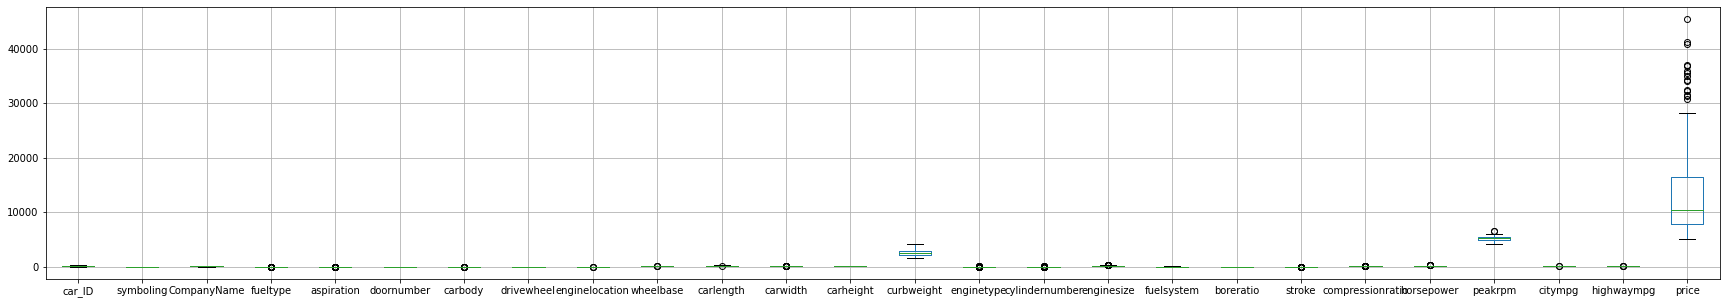

In [906]:
plt.figure(figsize=(30,5))
data_frame.boxplot()
print()

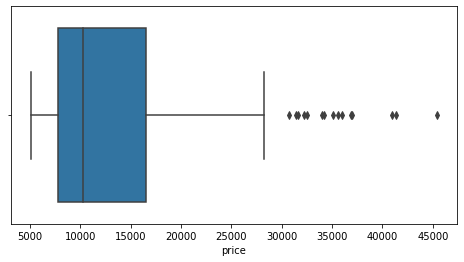

In [907]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=data_frame['price'])
plt.show()

In [908]:
price = data_frame['price']
q1 = price.quantile(0.25)
q3 = price.quantile(0.75)
IQR = q3 - q1
outliers_min = q1 - (1.5 * IQR)
outliers_max = q3 + (1.5 * IQR)

df_outliers = price[(price < outliers_min) | (price > outliers_max)]
data_frame = data_frame[data_frame['price'] >= outliers_min]
data_frame = data_frame[data_frame['price'] <= outliers_max]
data_frame.shape

(190, 26)

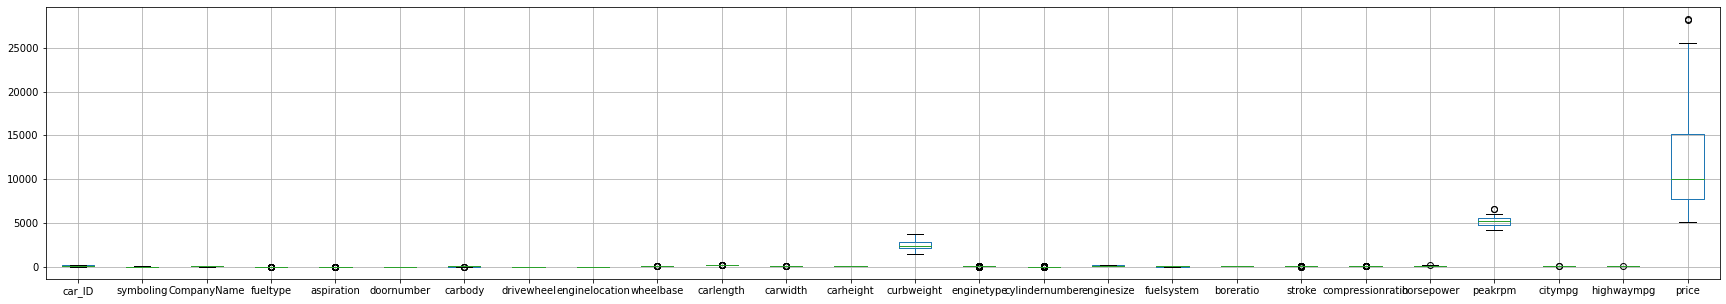

In [909]:
plt.figure(figsize=(30,5))
data_frame.boxplot()
print()

In [910]:
data_frame

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,21,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,21,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,21,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,21,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


### Feature Scaling

In [911]:
scaler = preprocessing.MinMaxScaler()

names = data_frame.columns
d = scaler.fit_transform(data_frame)
scaler_data_frame = pd.DataFrame(d, columns=names)
scaler_data_frame['price'] = data_frame['price']
scaler_data_frame

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.000000,1.0,0.000000,1.0,0.0,1.0,0.00,1.0,0.0,0.072464,...,0.565574,0.714286,0.664286,0.333333,0.12500,0.414474,0.346939,0.151515,0.205882,13495.0
1,0.004902,1.0,0.000000,1.0,0.0,1.0,0.00,1.0,0.0,0.072464,...,0.565574,0.714286,0.664286,0.333333,0.12500,0.414474,0.346939,0.151515,0.205882,16500.0
2,0.009804,0.6,0.000000,1.0,0.0,1.0,0.50,1.0,0.0,0.286232,...,0.745902,0.714286,0.100000,0.765027,0.12500,0.697368,0.346939,0.090909,0.176471,16500.0
3,0.014706,0.8,0.047619,1.0,0.0,0.0,0.75,0.5,0.0,0.478261,...,0.393443,0.714286,0.464286,0.726776,0.18750,0.355263,0.551020,0.242424,0.294118,13950.0
4,0.019608,0.8,0.047619,1.0,0.0,0.0,0.75,0.0,0.0,0.463768,...,0.614754,0.714286,0.464286,0.726776,0.06250,0.440789,0.551020,0.060606,0.058824,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.980392,0.2,1.000000,1.0,0.0,0.0,0.75,1.0,0.0,0.815217,...,0.655738,0.714286,0.885714,0.590164,0.15625,0.434211,0.510204,0.212121,0.235294,8195.0
186,0.985294,0.2,1.000000,1.0,1.0,0.0,0.75,1.0,0.0,0.815217,...,0.655738,0.714286,0.885714,0.590164,0.10625,0.736842,0.469388,0.090909,0.147059,8495.0
187,0.990196,0.2,1.000000,1.0,0.0,0.0,0.75,1.0,0.0,0.815217,...,0.918033,0.714286,0.742857,0.437158,0.11250,0.565789,0.551020,0.060606,0.088235,9495.0
188,0.995098,0.2,1.000000,0.0,1.0,0.0,0.75,1.0,0.0,0.815217,...,0.688525,0.428571,0.335714,0.726776,1.00000,0.381579,0.265306,0.303030,0.205882,9995.0


### Exploratory Data Analysis ( EDA )

In [912]:
num_var = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg','highwaympg','price']

scaler_data_frame[num_var].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,175.000000
mean,0.567368,0.423055,0.548643,0.480654,0.450478,0.438564,0.470621,0.545414,0.645499,0.198987,0.323892,0.397744,0.301435,0.338854,11078.178097
std,0.246002,0.191339,0.196813,0.166213,0.220513,0.197122,0.220117,0.186908,0.166145,0.250991,0.198855,0.192487,0.188270,0.190483,4817.993668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.400000,0.286232,0.435986,0.333333,0.290909,0.282935,0.295082,0.421429,0.577869,0.106250,0.144737,0.265306,0.151515,0.176471,7551.000000
50%,0.600000,0.358696,0.543253,0.459459,0.481818,0.400973,0.401639,0.521429,0.666667,0.125000,0.289474,0.428571,0.272727,0.323529,9295.000000
75%,0.800000,0.500000,0.644464,0.558559,0.609091,0.590517,0.614754,0.714286,0.732240,0.150000,0.434211,0.551020,0.454545,0.500000,13905.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28248.000000


In [913]:
scaler_data_frame[num_var].corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.510587,-0.327519,-0.210088,-0.542455,-0.221915,-0.125601,-0.157305,0.055306,-0.175222,0.076022,0.239516,-0.046133,0.018035,0.079889
wheelbase,-0.510587,1.000000,0.859280,0.794353,0.633945,0.780903,0.570260,0.512363,0.055781,0.302991,0.377546,-0.304770,-0.455649,-0.511091,0.081418
carlength,-0.327519,0.859280,1.000000,0.832535,0.534056,0.869948,0.686552,0.599479,0.059792,0.191597,0.564379,-0.252795,-0.645277,-0.663684,0.077775
carwidth,-0.210088,0.794353,0.832535,1.000000,0.342674,0.838538,0.698108,0.528538,0.166125,0.229062,0.603085,-0.187687,-0.606134,-0.631884,0.131242
carheight,-0.542455,0.633945,0.534056,0.342674,1.000000,0.388335,0.178920,0.212620,-0.105190,0.275279,-0.039881,-0.310161,-0.080626,-0.133196,-0.001951
curbweight,-0.221915,0.780903,0.869948,0.838538,0.388335,1.000000,0.837881,0.627042,0.123491,0.207844,0.734304,-0.264091,-0.724138,-0.760200,0.074455
enginesize,-0.125601,0.570260,0.686552,0.698108,0.178920,0.837881,1.000000,0.579403,0.272543,0.122765,0.757357,-0.331153,-0.609982,-0.625118,0.075600
boreratio,-0.157305,0.512363,0.599479,0.528538,0.212620,0.627042,0.579403,1.000000,-0.077820,0.023580,0.497082,-0.307256,-0.526432,-0.543197,0.021174
stroke,0.055306,0.055781,0.059792,0.166125,-0.105190,0.123491,0.272543,-0.077820,1.000000,0.205213,0.140763,-0.012708,-0.028100,-0.015464,-0.053520
compressionratio,-0.175222,0.302991,0.191597,0.229062,0.275279,0.207844,0.122765,0.023580,0.205213,1.000000,-0.234220,-0.451696,0.332195,0.270075,-0.030542


<AxesSubplot:>

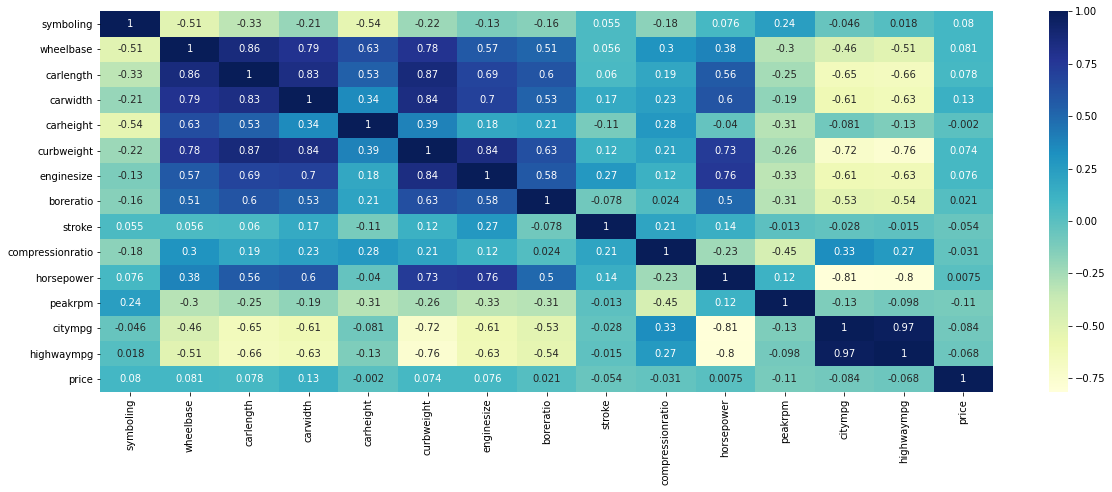

In [914]:
import seaborn as sns

plt.figure(figsize=(20,7))
correlacao = scaler_data_frame[num_var].corr()
sns.heatmap(correlacao, annot = True, cmap='YlGnBu')


In [915]:
correlations = scaler_data_frame[num_var].corr()['price'].drop('price')
correlations.sort_values()

peakrpm            -0.105646
citympg            -0.084096
highwaympg         -0.067726
stroke             -0.053520
compressionratio   -0.030542
carheight          -0.001951
horsepower          0.007480
boreratio           0.021174
curbweight          0.074455
enginesize          0.075600
carlength           0.077775
symboling           0.079889
wheelbase           0.081418
carwidth            0.131242
Name: price, dtype: float64

<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='price'>

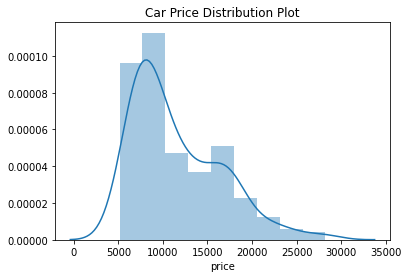

In [916]:
plt.title('Car Price Distribution Plot')
sns.distplot(data_frame.price)

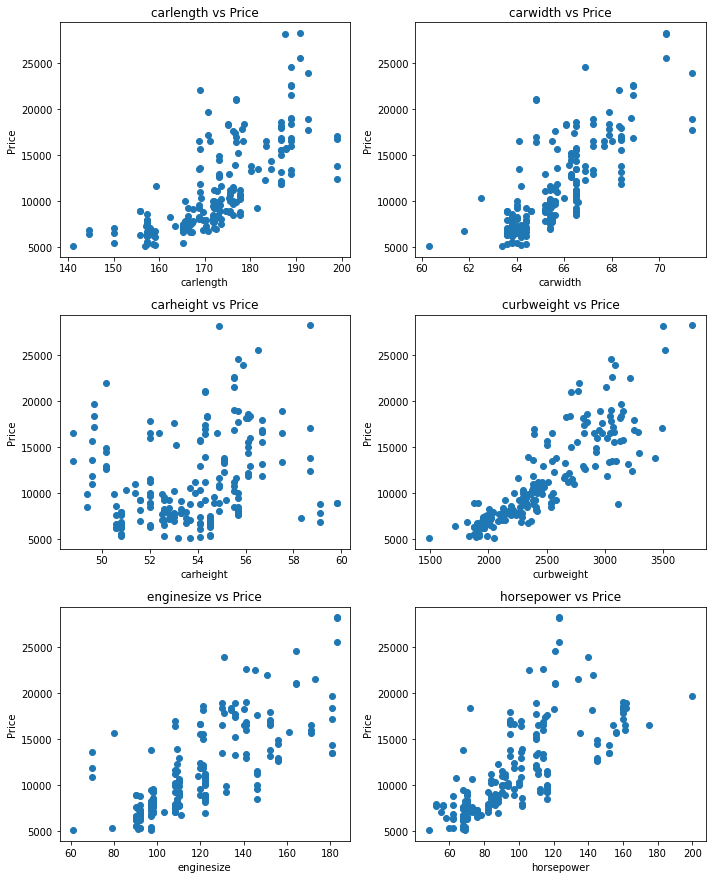

In [917]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data_frame[x],data_frame['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)
scatter('enginesize', 5)
scatter('horsepower', 6)

plt.tight_layout()

## Data Prepration

In [918]:
data_frame

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,21,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,21,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,21,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,21,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [919]:
# Dependant (Target) Variable:
y = data_frame['price']
# Independant Variables:
X = data_frame[['symboling', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]


In [920]:
# split the data into train_test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [921]:
print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (152, 21)
y_train:  (152,)
X_test:  (38, 21)
y_test:  (38,)


### Lasso Regression

In [922]:
lasso = Lasso(alpha=10000)
lasso.fit(X_train, y_train) 
print(lasso.coef_)
print(lasso.intercept_)


[ 0.         -0.          0.          0.         -0.          0.
  0.          0.          0.          0.         -0.          9.33414672
  0.          0.          0.         -0.          0.          0.
  0.30093004 -0.         -0.        ]
-13114.373141956752


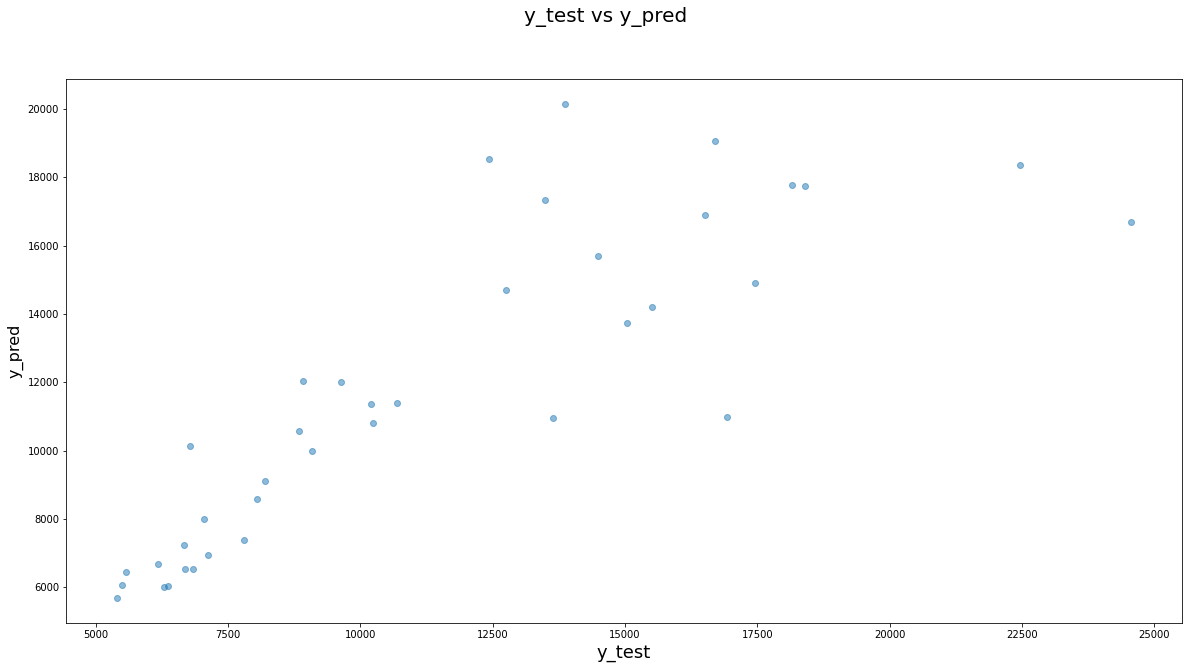

In [923]:
y_pred = lasso.predict(X_test)
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [924]:
y_pred = lasso.predict(X_test)
y_train_pred = lasso.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )


Training Error: 2532.729711160178
Testing Error: 2672.843741522095


In [925]:
df = pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
df['Predictions']= round(df['Predictions'],2)
df.head()

,Actual,Predictions
34,7129.0,6948.80
77,6189.0,6686.32
123,8921.0,12052.34
135,15510.0,14209.09
92,6849.0,6540.04


In [926]:
from sklearn import metrics 
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))

7144093.666593832
0.7097657084243588


Text(0, 0.5, 'price')

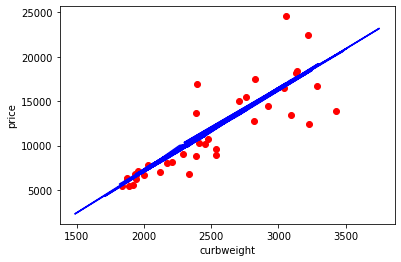

In [1014]:
plt.scatter(X_test['curbweight'], y_test,color = 'red')
plt.plot(X_train['curbweight'], lasso.predict(X_train), color = 'blue')
plt.xlabel('curbweight')                          
plt.ylabel('price') 

### Ridge Regression


In [1003]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10000)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 5.89903075e-04, -1.62989656e-03,  4.72615111e-03,  1.44168146e-03,
       -3.85607876e-03,  9.87576431e-03,  0.00000000e+00,  7.44475565e-02,
        1.46734389e-01,  3.72198380e-02,  2.81822815e-03,  7.25427215e+00,
       -1.45494322e-04,  4.57374373e-01,  2.46176023e-03,  4.80720361e-04,
        1.95608713e-02,  5.83717669e-01,  2.18588283e-01, -9.39045129e-02,
       -9.45891372e-02])

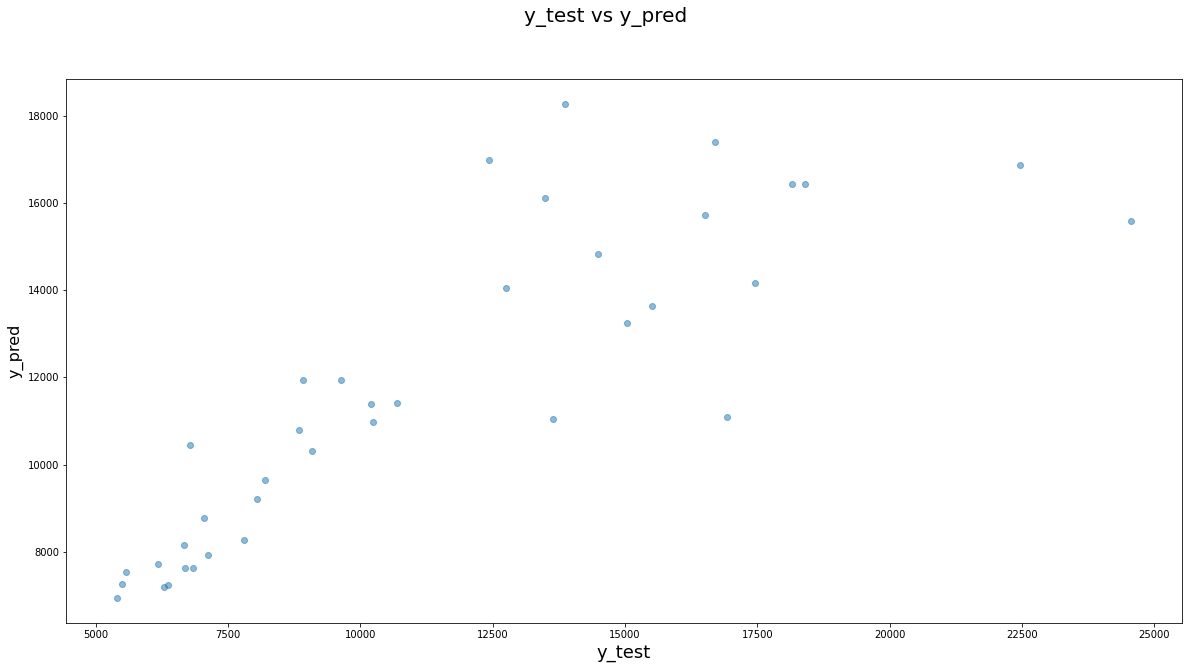

In [1004]:
y_pred = ridge.predict(X_test)
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)            
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [1005]:
y_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )


Training Error: 2751.152118126123
Testing Error: 2746.899533968467


In [1006]:
df= pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
df['Predictions']= round(df['Predictions'],2)
df.head()

,Actual,Predictions
34,7129.0,7932.11
77,6189.0,7731.71
123,8921.0,11939.76
135,15510.0,13626.50
92,6849.0,7626.79


In [1007]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))

7545457.049716181
0.6934600127544339


Text(0, 0.5, 'price')

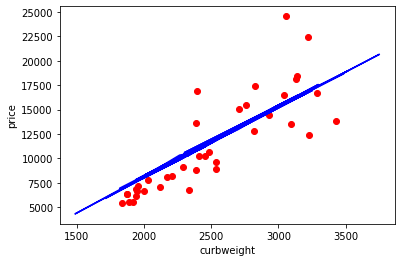

In [1013]:
plt.scatter(X_test['curbweight'], y_test,color = 'red')
plt.plot(X_train['curbweight'], ridge.predict(X_train), color = 'blue')
plt.xlabel('curbweight')                          
plt.ylabel('price') 

### ElasticNet Regression

In [990]:
model_enet = ElasticNet(alpha=10000)
model_enet.fit(X_train, y_train) 
y_train_pred = model_enet.predict(X_train)


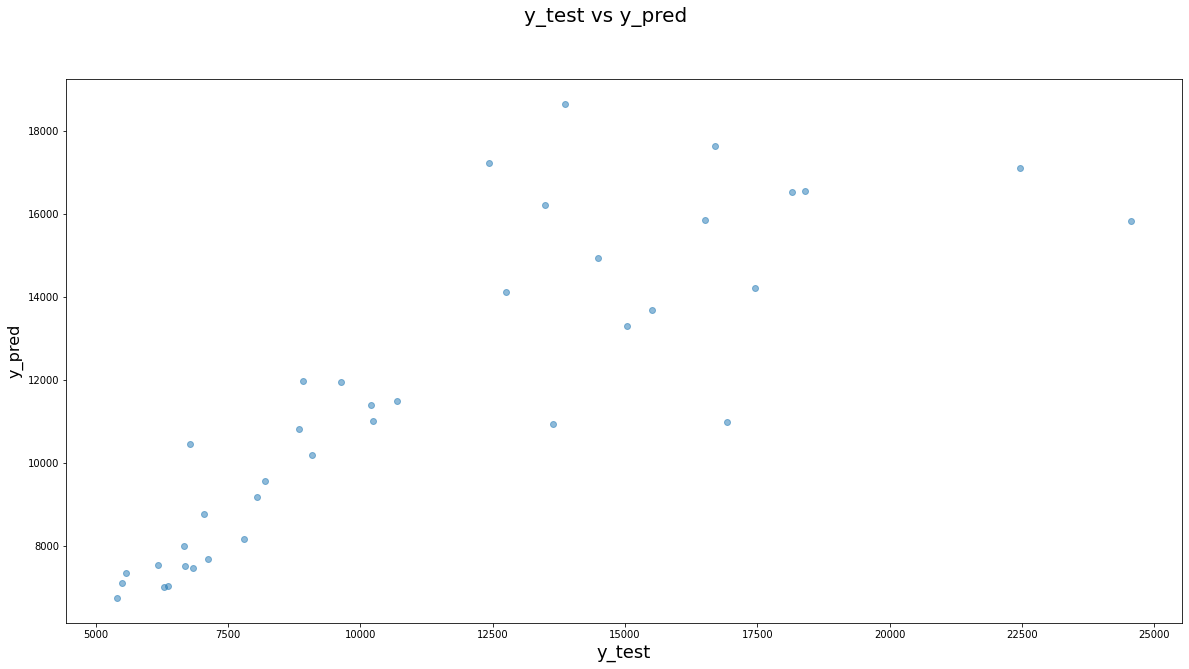

In [1015]:
y_pred = model_enet.predict(X_test)
fig = plt.figure(figsize=(20,10))
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)            
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [991]:
y_pred = model_enet.predict(X_test)
y_train_pred = model_enet.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )


Training Error: 2718.030870913578
Testing Error: 2729.6774978189283


In [992]:
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))

7451139.242099006
0.6972917461210808


Text(0, 0.5, 'price')

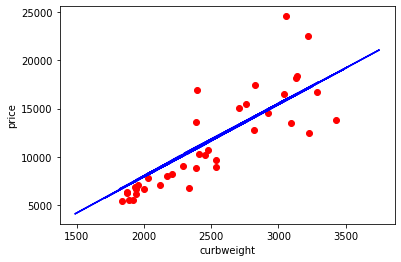

In [1012]:
plt.scatter(X_test['curbweight'], y_test,color = 'red')
plt.plot(X_train['curbweight'], model_enet.predict(X_train), color = 'blue')
plt.xlabel('curbweight')                          
plt.ylabel('price') 

### Ensemble for Regression

In [995]:
Voting_Reg = VotingRegressor(estimators=[('Ridge', ridge), ('Lasso', lasso), ('ElNet', model_enet)])
Voting_Reg.fit(X_train, y_train)
pred_train_Voting_Reg = Voting_Reg.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_Voting_Reg)))
print(r2_score(y_train, pred_train_Voting_Reg))

pred_test_Voting_Reg= Voting_Reg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_Voting_Reg))) 
print(r2_score(y_test, pred_test_Voting_Reg))

2530.411402499981
0.7389823904525781
2637.2486642600475
0.7174445127751927


In [939]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import VotingRegressor
 

def get_models():
    models = list()
    models.append(('Lasso', Lasso()))
    models.append(('Ridge', Ridge()))
    models.append(('ElasticNet', ElasticNet()))
    return models

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
models = get_models()
scores = [0.753, 0.7535, 0.757]
ensemble = VotingRegressor(estimators=models, weights=scores)
ensemble.fit(X_train, y_train)
yhat = ensemble.predict(X_test)
score = r2_score(y_test, yhat)
print('Weighted Avg r2_score: %.3f' % (score))

ensemble = VotingRegressor(estimators=models)
ensemble.fit(X_train, y_train)
yhat = ensemble.predict(X_test)
score = r2_score(y_test, yhat)
print('Voting r2_score: %.3f' % (score))


Weighted Avg r2_score: 0.756
Voting r2_score: 0.756


Text(0, 0.5, 'price')

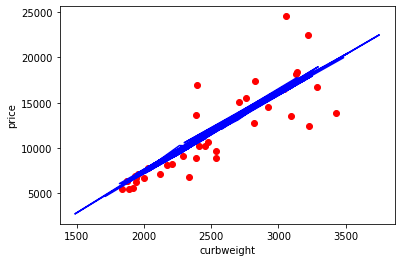

In [1011]:
plt.scatter(X_test['curbweight'], y_test,color = 'red')
plt.plot(X_train['curbweight'], Voting_Reg.predict(X_train), color = 'blue')
plt.xlabel('curbweight')                          
plt.ylabel('price') 